In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
air=pd.read_csv("C:\\Users\\kumar\\Python Assign\\Clustering\\Assignments\\EastWestAirlines.csv")

In [2]:
air.isnull().sum()

id                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [3]:
air.describe()


,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


NO NULL VALUES SO SCALING THE FEATURES

In [5]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
air.id=scaler.fit_transform(air[['id']])
air.Balance=scaler.fit_transform(air[['Balance']])
air.Qual_miles=scaler.fit_transform(air[['Qual_miles']])
air.cc1_miles=scaler.fit_transform(air[['cc1_miles']])
air.cc2_miles=scaler.fit_transform(air[['cc2_miles']])
air.cc3_miles=scaler.fit_transform(air[['cc3_miles']])
air.Bonus_miles=scaler.fit_transform(air[['Bonus_miles']])
air.Bonus_trans=scaler.fit_transform(air[['Bonus_trans']])
air.Flight_miles_12mo=scaler.fit_transform(air[['Flight_miles_12mo']])
air.Flight_trans_12=scaler.fit_transform(air[['Flight_trans_12']])
air.Days_since_enroll=scaler.fit_transform(air[['Days_since_enroll']])
air.Award=scaler.fit_transform(air[['award']])

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float

####  DIMENSIONALITY REDUCTION USING PCA

EACH OF THE PRINCIPAL COMPONENT IS CHOSEN IN SUCH A WAY THAT IT WOULD DESCRIBE MOST OF THE STILL AVAILABLE VARIANCE (INFORMATION) AND ALL THESE PRINCIPAL COMPONENTS ARE ORTHOGONAL TO EACH OTHER.

IN ALL PRINCIPAL COMPONENTS FIRST PRINCIPAL COMPONENT HAS AMXIMUM VARIANCE 

In [6]:
from sklearn.decomposition import PCA
pca = PCA()

In [7]:
pca_values = pca.fit_transform(air)


In [8]:
pca_values.shape

(3999, 12)

In [9]:
pca.components_

array([[-2.82790843e-01,  3.33108966e-01,  7.40721946e-02,
         4.02966345e-01, -8.73297634e-04,  7.70440424e-02,
         4.36966405e-01,  4.27812424e-01,  2.76853741e-01,
         2.94113503e-01,  2.89721500e-01,  1.19206717e-01],
       [ 4.77298673e-01, -1.38140307e-02,  1.30261886e-01,
        -1.42899100e-01,  5.44389723e-02, -2.06279849e-02,
        -4.84548445e-02,  1.53451601e-01,  4.93300814e-01,
         4.87816618e-01, -4.73086115e-01,  1.41858381e-02],
       [ 4.17659726e-01, -1.76101656e-02, -1.48802991e-01,
         4.26799834e-01, -3.48195456e-02,  2.10878812e-01,
         3.86726105e-01,  1.95539730e-01, -3.24422101e-01,
        -3.30311052e-01, -4.15873563e-01,  1.29905820e-02],
       [-3.88719328e-02, -1.13466843e-01, -4.61788646e-01,
        -6.87307792e-02,  8.58895783e-01,  1.10879589e-01,
         1.13072253e-03,  1.14192879e-01,  2.42962172e-02,
         3.64809444e-02,  5.13846958e-02, -6.51777664e-03],
       [-6.99330427e-02, -9.17982264e-02, -2.3888781

In [11]:
#TO OBSERVE VARIANCE ATTAINED BY EACH COMPONENT

In [12]:
var = pca.explained_variance_ratio_
pca.components_[0]

array([-0.28279084,  0.33310897,  0.07407219,  0.40296634, -0.0008733 ,
        0.07704404,  0.4369664 ,  0.42781242,  0.27685374,  0.2941135 ,
        0.2897215 ,  0.11920672])

### SCREE PLOT


IF WE WANT TO KNOW THE NO.OF COMPONENTS TO BE TAKEN IT IS POSSIBLE BY OBSERVING SCREE PLOT

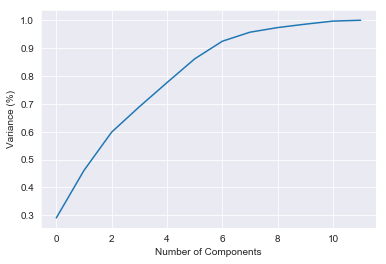

In [14]:
plt.figure()
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

cumulative sum of variance explained by each component.



here a[2] represents cumulative sum of variance explained first three principal components...

In [15]:
a=np.cumsum(var)
a=np.round(a,2)

In [16]:
a

array([0.29, 0.46, 0.6 , 0.69, 0.78, 0.86, 0.92, 0.96, 0.97, 0.99, 1.  ,
       1.  ])

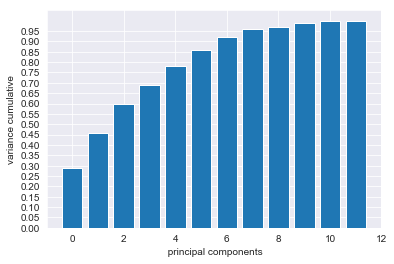

In [19]:
plt.bar(np.arange(len(a)),a)
plt.yticks(np.arange(0, 1, step=0.05))
plt.xlabel(" principal components")
plt.ylabel("variance cumulative")
plt.show()

In [88]:
##### BY OBSERVING THE SCREE PLIT AT 8 COMPONENTS 95% OF THE VARIANCE IS EXPLAINED

In [20]:
pca=PCA(n_components=8)
pca_values=pca.fit_transform(air)
pca_values=pd.DataFrame(pca_values)

In [21]:
pca_values.shape

(3999, 8)

In [22]:
### WE CAN GET THE REQUIRED COMPONENTS BY SPECIFYING THE AMOUNT OF VARIANCE WE REQUIRED WITH OUT PLOTTING THE SCREE PLOT

### PCA(0.95) DESCRIBES DIVIDE THE COMPONENTS SUCH THAT 95% OF THE VARAINCE IS RETAINED BY GROUPING THOSE COMPONENTS

In [23]:
#pca=PCA(0.95) USING THIS

In [24]:
## APPLYING KMEANS

6


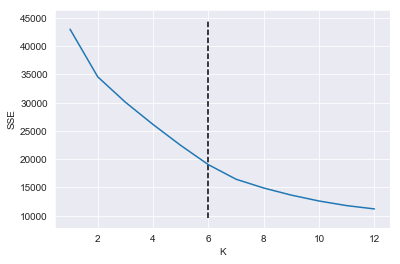

In [25]:
from sklearn.cluster import KMeans

k_rng=range(1,13)
sse=[] # SUM OF SQUARED ERRORS
for k in k_rng:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_values)
    sse.append(kmeans.inertia_)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)
from kneed import KneeLocator
kn = KneeLocator(k_rng, sse, curve='convex', direction='decreasing')
print(kn.knee)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')



In [26]:
kmeans=KMeans(n_clusters=6,random_state=0)
kmeans.fit(pca_values)
labels=kmeans.labels_ 
labels
centers=kmeans.cluster_centers_
centers

array([[-2.38619287e-01, -8.91535504e-01, -9.95366927e-01,
         4.51171554e-04,  1.79123253e-01, -9.71020625e-02,
        -8.88240141e-02, -7.19549590e-02],
       [ 1.95932371e+00, -6.01752740e-01,  9.49371809e-01,
        -1.30006078e-01, -4.21903082e-01,  1.73392003e-03,
        -8.78763226e-02,  1.30184770e-01],
       [-1.32757246e+00,  7.28464471e-01,  4.74262297e-01,
        -1.42805596e-01, -3.59910669e-02, -9.53870184e-03,
         1.19435159e-01, -2.60837994e-02],
       [ 4.14816706e+00, -5.94492279e-01,  5.05127019e+00,
         1.77199314e+00,  1.44830255e+01,  1.70955411e+00,
         6.25383728e-01, -3.53209229e-01],
       [ 3.95107194e+00,  3.88675734e+00, -2.25467421e+00,
        -1.98508422e-01,  2.68152770e-01, -3.95656444e-01,
        -5.45516557e-02,  9.97178854e-02],
       [-8.02851654e-02,  9.58846601e-01, -4.86693534e-01,
         7.94754713e+00, -1.35446424e+00,  4.04918592e+00,
         2.18058294e-01,  2.40167998e-01]])

In [29]:
pca_values['cluster']=labels
pca_values1=pca_values[pca_values.cluster==0]
pca_values2=pca_values[pca_values.cluster==1]
pca_values3=pca_values[pca_values.cluster==2]
pca_values4=pca_values[pca_values.cluster==3]
pca_values5=pca_values[pca_values.cluster==4]
pca_values6=pca_values[pca_values.cluster==5]

In [30]:
pca_values

,0,1,2,3,4,5,6,7,cluster
0,-0.605040,-1.879852,-1.873880,0.092274,0.408924,-0.218968,-0.205877,0.290253,0
1,-0.593898,-1.854992,-1.844500,0.113359,0.407526,-0.235552,-0.309078,0.217467,0
2,-0.351969,-1.848614,-1.757985,0.114037,0.369486,-0.209505,-0.171342,0.100161,0
3,-0.650796,-1.866443,-1.855576,0.106047,0.419294,-0.237152,-0.325166,0.311372,0
4,3.227359,-0.610778,-0.558427,0.229687,-0.148367,-0.611962,-0.867826,-0.054808,1
5,-0.700851,-1.878532,-1.881501,0.091964,0.426227,-0.230801,-0.284084,0.383627,0
6,1.729112,-1.762654,-0.334372,0.214834,-0.145150,-0.240021,-0.593004,-0.955976,1
7,-0.167836,-1.593121,-1.847252,0.142055,0.394272,-0.292570,-0.451386,0.296780,0
8,5.047506,1.821805,-2.592578,6.016779,-1.225165,2.455146,2.105267,-1.662852,5
9,2.515476,-0.898427,-0.762649,0.268720,-0.093451,-0.461771,-0.638678,-0.853488,1


In [27]:
## METRICS
from sklearn.metrics.pairwise import pairwise_distances

distances = pairwise_distances(pca_values)
from sklearn.metrics import silhouette_score
silhouette_score(distances, labels, metric='euclidean', sample_size=None, random_state=None)


0.27881083703506304

In [28]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_values, labels)  


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.0003538533828997

DB SCORE IS VERY LESS WHEN COMPARED WITH THE MODEL TO WHICH PCA NOT APPLIED 

#### INFERENCE:


###### CLUSETRTING PERFORMANCE INCREASED AFTER DOING PCA AND  EACH OF THE CLUSETRS HAVE LESS INTRA CLUSTER DISTANCE AND EACH OF THEM SEPARTED WELL .